In [18]:
import pandas as pd
df = pd.read_csv('cleaned_google_news_final.csv')

In [19]:
df.head()

,Title,Link,Snippet,Snippet_Clean
0,Who Are the 2024 Presidential Election Candida...,https://www.nytimes.com/interactive/2023/us/po...,"Nov 12, 2023 ... Republicans Read more: Candid...","Nov 12, 2023 ... Republicans Read more Candida..."
1,"2024 Election: News, polls and results | CNN P...",https://www.cnn.com/election/2024,2 days ago ... Let CNN be your guide to the 20...,2 days ago ... Let CNN be your guide to the 20...
2,Trump Leads Biden in Nearly Every Battleground...,https://www.nytimes.com/2023/11/05/us/politics...,"Nov 5, 2023 ... President Biden is trailing Do...","Nov 5, 2023 ... President Biden is trailing Do..."
3,Putin won't make peace in Ukraine before 2024 ...,https://www.reuters.com/world/putin-wont-make-...,5 days ago ... Russian President Vladimir Puti...,5 days ago ... Russian President Vladimir Puti...
4,2024 US presidential election: Who are the can...,https://www.reuters.com/world/us/who-are-candi...,"Sep 19, 2023 ... Seven Republican candidates a...","Sep 19, 2023 ... Seven Republican candidates a..."


In [20]:
df.shape

(360, 4)

In [21]:
df = df.drop(columns=['Title','Link','Snippet'])
df.shape

(360, 1)

In [22]:
df.head()

,Snippet_Clean
0,"Nov 12, 2023 ... Republicans Read more Candida..."
1,2 days ago ... Let CNN be your guide to the 20...
2,"Nov 5, 2023 ... President Biden is trailing Do..."
3,5 days ago ... Russian President Vladimir Puti...
4,"Sep 19, 2023 ... Seven Republican candidates a..."


In [23]:
# You might need to install textblob and its corpora first
# !pip install textblob
# !python -m textblob.download_corpora

from textblob import TextBlob

# Function to get sentiment polarity
def get_sentiment(text):
    # Create a TextBlob object
    blob = TextBlob(text)
    # Return the polarity
    return blob.sentiment.polarity

# Apply the function to your dataframe
df['Sentiment_Polarity'] = df['Snippet_Clean'].apply(get_sentiment)

# Function to get sentiment subjectivity
def get_subjectivity(text):
    # Create a TextBlob object
    blob = TextBlob(text)
    # Return the subjectivity
    return blob.sentiment.subjectivity

# Apply the function to your dataframe
df['Sentiment_Subjectivity'] = df['Snippet_Clean'].apply(get_subjectivity)

# Now let's take a look at the dataframe with the sentiment scores
df.head()


,Snippet_Clean,Sentiment_Polarity,Sentiment_Subjectivity
0,"Nov 12, 2023 ... Republicans Read more Candida...",0.50,0.50
1,2 days ago ... Let CNN be your guide to the 20...,0.00,1.00
2,"Nov 5, 2023 ... President Biden is trailing Do...",0.45,0.75
3,5 days ago ... Russian President Vladimir Puti...,0.00,0.00
4,"Sep 19, 2023 ... Seven Republican candidates a...",0.05,0.50


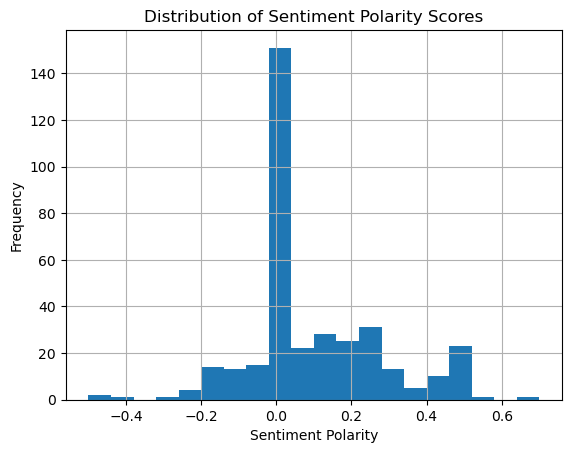

In [24]:
import matplotlib.pyplot as plt

# Compute summary statistics for sentiment polarity
polarity_stats = df['Sentiment_Polarity'].describe()

# Plot the distribution of sentiment polarity scores
df['Sentiment_Polarity'].hist(bins=20)
plt.title('Distribution of Sentiment Polarity Scores')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

# Save the DataFrame with sentiment scores
df.to_csv('sentiment_analysis_results.csv', index=False)


In [25]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Ensure NLTK resources are available
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load the dataset
file_path = 'cleaned_google_news_final.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Drop unnecessary columns
data_cleaned = data.drop(columns=['Link', 'Snippet'])

# Initialize NLTK tools
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Function to clean text
def clean_text(text):
    # Tokenization
    tokens = word_tokenize(text)

    # Remove stop words, then perform stemming and lemmatization
    cleaned_tokens = [
        lemmatizer.lemmatize(stemmer.stem(word))
        for word in tokens
        if word.lower() not in stop_words and word.isalpha()
    ]
    
    return cleaned_tokens

# Apply text cleaning to the 'Title' and 'Snippet_Clean' columns
data_cleaned['Title_Clean'] = data_cleaned['Title'].apply(clean_text)
data_cleaned['Snippet_Clean_Clean'] = data_cleaned['Snippet_Clean'].apply(clean_text)

# Save the cleaned data to a new CSV file
cleaned_file_path = '/Users/durgapravallikakuchipudi/final_cleaned_google_news_final.csv'  # Replace with your desired file path
data_cleaned.to_csv(cleaned_file_path, index=False)


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/durgapravallikakuchipudi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/durgapravallikakuchipudi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/durgapravallikakuchipudi/nltk_data...


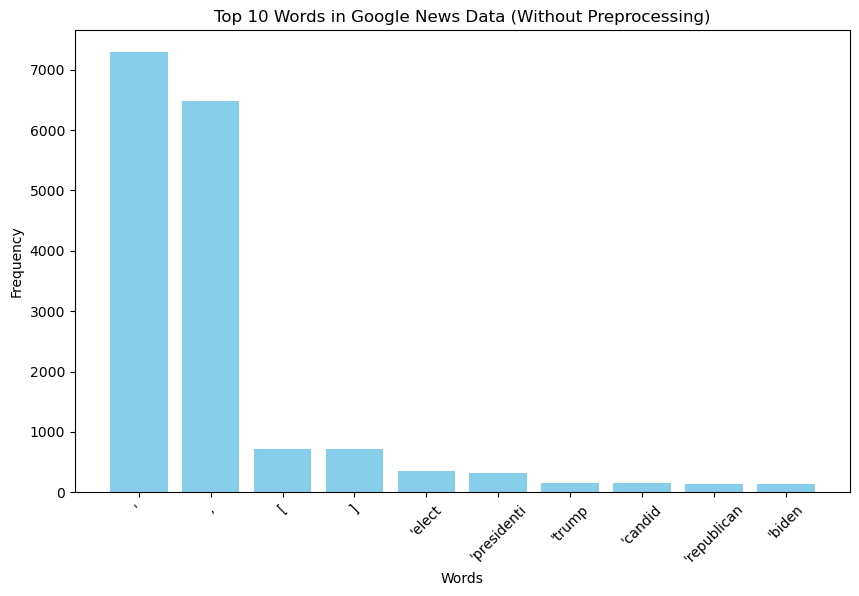

In [29]:
import pandas as pd
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt

# Load the Google News dataset
google_news_data = pd.read_csv('final_cleaned_google_news_final.csv')

# Combine 'Title_Clean' and 'Snippet_Clean' into a single text column
google_news_data['combined_text'] = google_news_data['Title_Clean'] + ' ' + google_news_data['Snippet_Clean']

# Tokenize the text without further preprocessing
google_news_data['tokenized_text'] = google_news_data['combined_text'].apply(word_tokenize)

# Counting word frequencies
all_words = [word for sublist in google_news_data['tokenized_text'] for word in sublist]
word_counts = Counter(all_words)

# Selecting top 10 words
top_words = dict(word_counts.most_common(10))

# Plotting the top 10 words
plt.figure(figsize=(10, 6))
plt.bar(top_words.keys(), top_words.values(), color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Words in Google News Data (Without Preprocessing)')
plt.xticks(rotation=45)
plt.show()


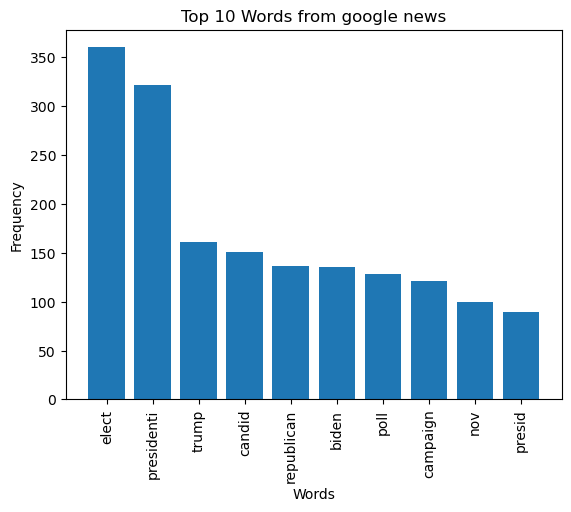

In [34]:
import pandas as pd
import ast
from collections import Counter
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'final_cleaned_google_news_final.csv'
data = pd.read_csv(file_path)

# Since the data contains string representations of lists, we use `ast.literal_eval` to safely evaluate them
def parse_list_string(list_string):
    try:
        # Safely evaluate the string as a list
        return ast.literal_eval(list_string)
    except ValueError:
        # In case of a ValueError, return an empty list
        return []

# Apply the parsing function to each column and concatenate the results
all_words = []
for column in ['Title_Clean', 'Snippet_Clean']:
    data[column].dropna().apply(lambda x: all_words.extend(parse_list_string(x)))

# Count the frequency of each word in the list
word_counts = Counter(all_words)

# Get the top 10 most common words
top_10_words = word_counts.most_common(10)

# Plot the top 10 words
fig, ax = plt.subplots()
words, frequencies = zip(*top_10_words)
ax.bar(words, frequencies)
ax.set_xlabel('Words')
ax.set_ylabel('Frequency')
ax.set_title('Top 10 Words from google news')
plt.xticks(rotation=90)
plt.show()


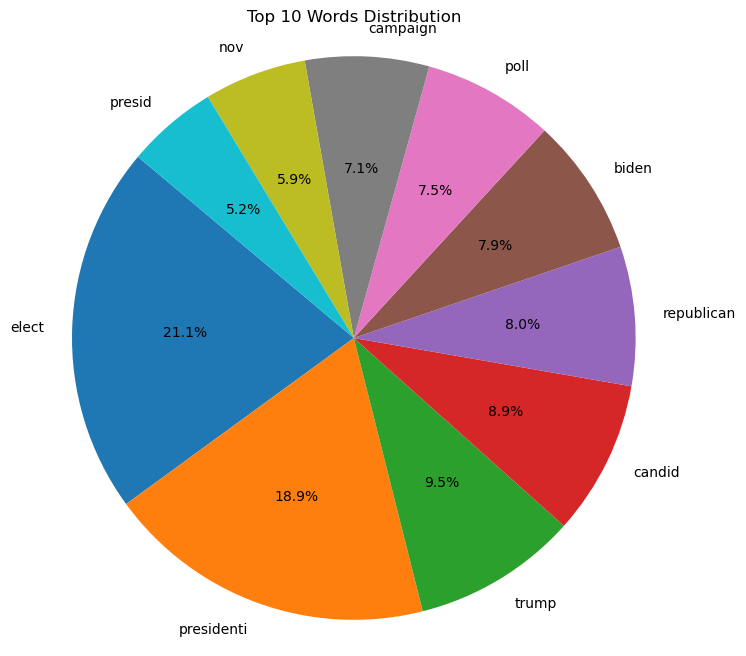

In [36]:
# Based on the previously successful extraction and the top 10 words, let's create a pie chart visualization.

# Getting the top 10 words again since the previous state has been reset
google_news_data = pd.read_csv('final_cleaned_google_news_final.csv')

# Parse the words from 'Title_Clean' and 'Snippet_Clean' columns
all_words = []
for column in ['Title_Clean', 'Snippet_Clean']:
    # Combining all words into a single list
    google_news_data[column].dropna().apply(
        lambda col: all_words.extend(ast.literal_eval(col))
    )

# Count the frequency of each word in the list
word_counts = Counter(all_words)

# Select the top 10 most common words
top_10_words = word_counts.most_common(10)

# Generate a pie chart
labels, sizes = zip(*top_10_words)
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Top 10 Words Distribution')
plt.show()


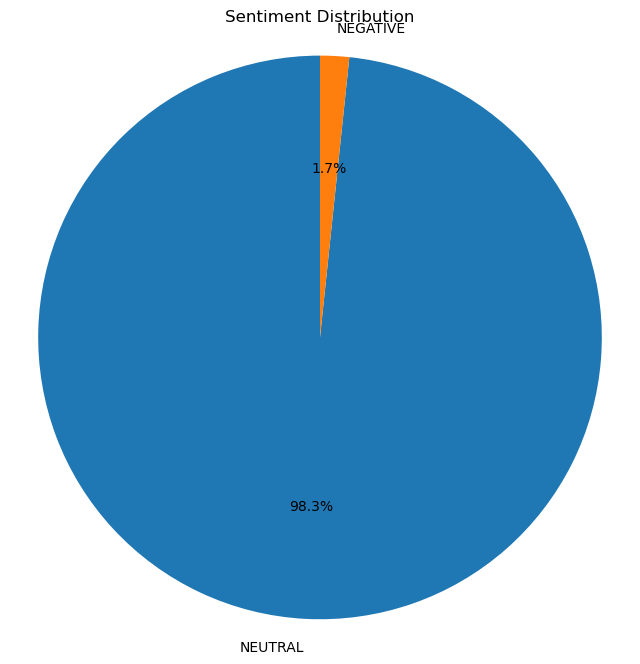

In [37]:
# Now that we have the CSV file, we can load it and create a pie chart of the sentiment distribution

# Load the CSV file into a DataFrame
df_csv = pd.read_csv('sentiment_data.csv')

# Summarize the sentiment counts
sentiment_counts = df_csv['Sentiment'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


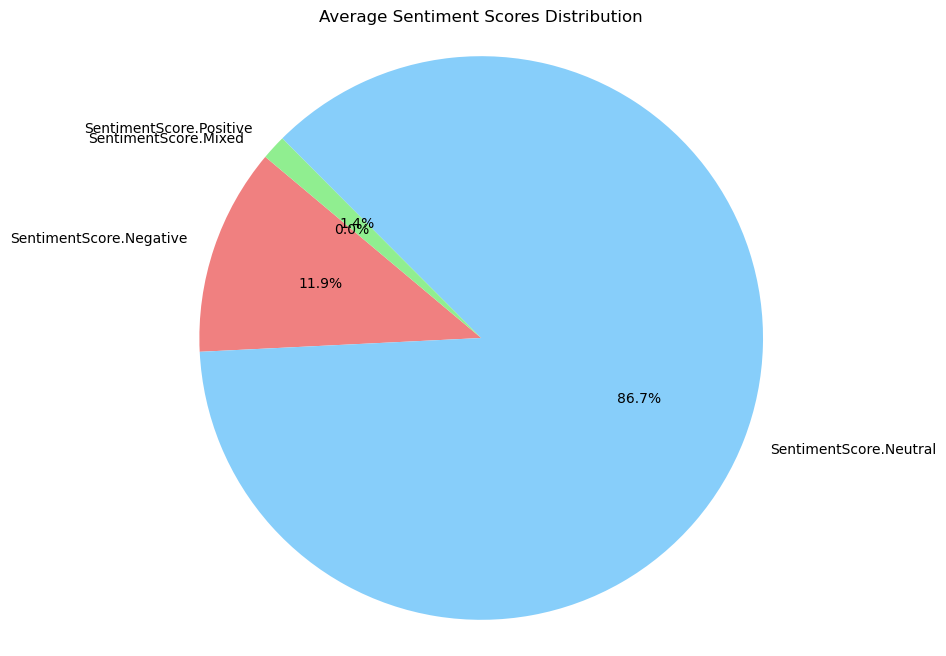

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
sentiment_df = pd.read_csv('sentiment_data.csv')

# We will create a pie chart based on the average of each sentiment score type
average_scores = sentiment_df[['SentimentScore.Mixed', 'SentimentScore.Negative', 
                               'SentimentScore.Neutral', 'SentimentScore.Positive']].mean()

# Plotting the pie chart
labels = average_scores.index
sizes = average_scores.values
colors = ['gold', 'lightcoral', 'lightskyblue', 'lightgreen']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Average Sentiment Scores Distribution')
plt.show()


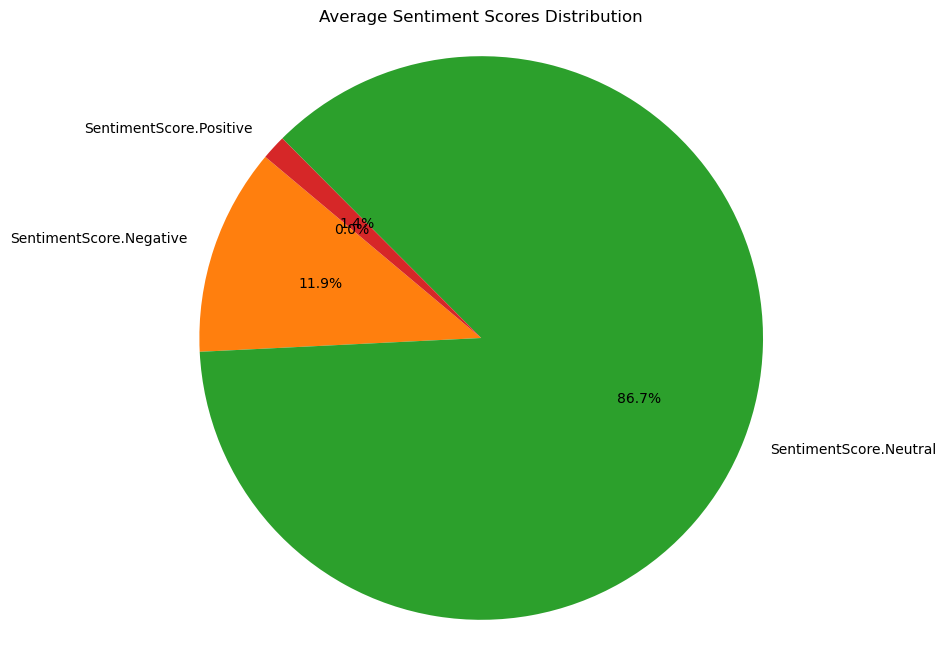

In [39]:
import matplotlib.pyplot as plt

# Define a minimum threshold for visibility in the pie chart (e.g., 0.1%)
threshold = 0.001

# Calculate the sum of scores
total_scores = sum(average_scores)

# Calculate the percentage for each sentiment score
percentages = [(score / total_scores) * 100 for score in average_scores]

# Assign a label to each sentiment score. If the percentage is smaller than the threshold, we label it as ''
labels = [index if percentage >= threshold else '' for index, percentage in zip(average_scores.index, percentages)]

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(average_scores, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Average Sentiment Scores Distribution')
plt.show()


In [40]:
# Let's load the dataset and calculate the word rank based on frequency.
import pandas as pd

# Load the dataset
google_news_file = 'final_cleaned_google_news_final.csv'
google_news_data = pd.read_csv(google_news_file)

# Parsing the words from 'Title_Clean' and 'Snippet_Clean' columns
all_words = []
for column in ['Title_Clean', 'Snippet_Clean']:
    # Combining all words into a single list
    google_news_data[column].dropna().apply(
        lambda col: all_words.extend(ast.literal_eval(col))
    )

# Count the frequency of each word in the list
word_freq = pd.Series(all_words).value_counts().reset_index()
word_freq.columns = ['Word', 'Frequency']

# Rank the words by frequency
word_freq['Rank'] = word_freq['Frequency'].rank(ascending=False)

word_freq.head()  # Display the top words by rank



,Word,Frequency,Rank
0,elect,360,1.0
1,presidenti,322,2.0
2,trump,161,3.0
3,candid,151,4.0
4,republican,136,5.0


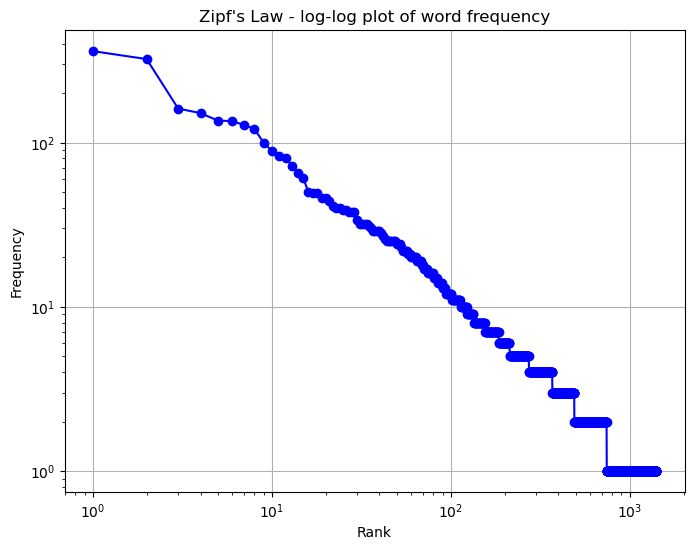

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'word_freq' is a DataFrame with the word frequencies and their ranks
word_freq = word_freq.sort_values(by='Frequency', ascending=False)
frequencies = word_freq['Frequency'].values
ranks = np.arange(1, len(frequencies) + 1)

# Plotting the frequencies against the ranks
plt.figure(figsize=(8, 6))
plt.loglog(ranks, frequencies, marker='o', linestyle='-', color='b')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title('Zipf\'s Law - log-log plot of word frequency')
plt.grid(True)
plt.show()


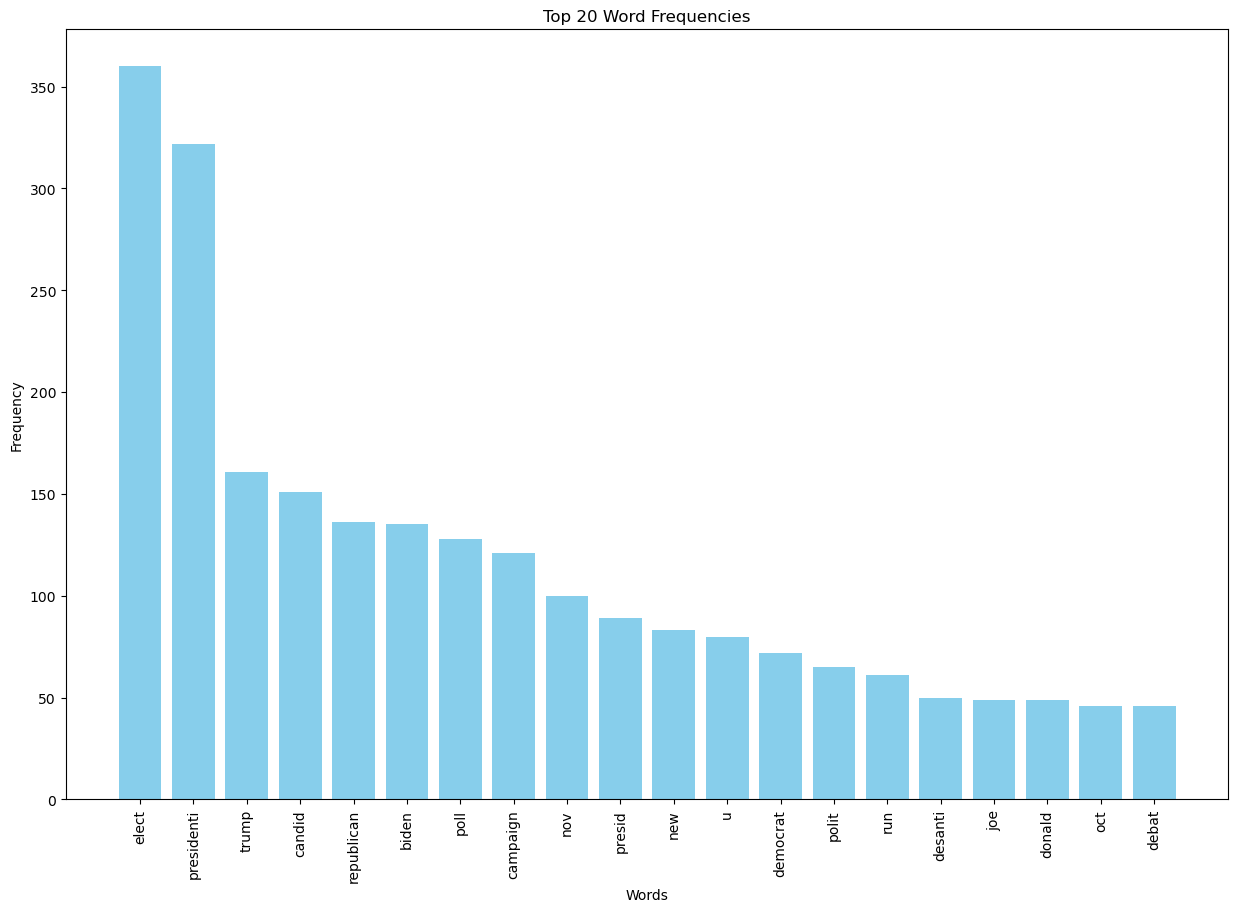

In [42]:
import matplotlib.pyplot as plt

# Assuming 'word_freq' is your DataFrame containing the words and their frequencies
word_freq = word_freq.sort_values(by='Frequency', ascending=False)

plt.figure(figsize=(15, 10))
plt.bar(word_freq['Word'].head(20), word_freq['Frequency'].head(20), color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.title('Top 20 Word Frequencies')
plt.show()


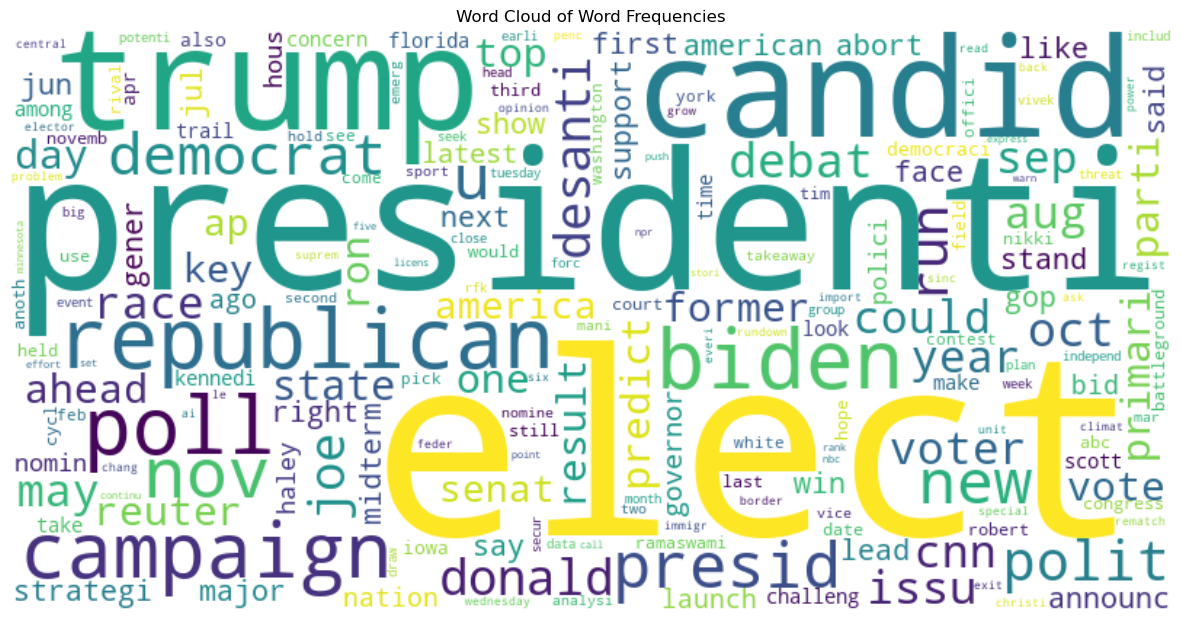

In [43]:
from wordcloud import WordCloud

# Generating the word cloud from frequencies
wordcloud = WordCloud(width=800, height=400, background_color ='white')

# Assuming 'word_freq' is a Series with words as the index and their frequencies as values
word_freq_dict = word_freq.set_index('Word')['Frequency'].to_dict()
wordcloud.generate_from_frequencies(word_freq_dict)

# Display the word cloud
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.title('Word Cloud of Word Frequencies')
plt.show()
